In [485]:
import pandas as pd
import numpy as np

データの読み込み

In [486]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [487]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


学習データを特徴量と目的変数に分ける

In [488]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']

#テストデータは特徴量のみなのでそのまま
test_x = test.copy()

データの揺れ(型)を確認する

In [489]:
train_x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

データの欠損値の確認をする

In [490]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [491]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

####  変数の削除をする

In [492]:
#変数PassengeerIdを削除する
train_x = train_x.drop(['PassengerId'],axis=1)
test_x = test_x.drop(['PassengerId'],axis=1)

## データの確認

ただ乗りしている人がいる！？

In [493]:
fare_zero_rows = train_x[train_x['Fare'] == 0]
print(fare_zero_rows)

     Pclass                              Name   Sex   Age  SibSp  Parch  \
179       3               Leonard, Mr. Lionel  male  36.0      0      0   
263       1             Harrison, Mr. William  male  40.0      0      0   
271       3      Tornquist, Mr. William Henry  male  25.0      0      0   
277       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0   
302       3   Johnson, Mr. William Cahoone Jr  male  19.0      0      0   
413       2    Cunningham, Mr. Alfred Fleming  male   NaN      0      0   
466       2             Campbell, Mr. William  male   NaN      0      0   
481       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0   
597       3               Johnson, Mr. Alfred  male  49.0      0      0   
633       1     Parr, Mr. William Henry Marsh  male   NaN      0      0   
674       2        Watson, Mr. Ennis Hastings  male   NaN      0      0   
732       2              Knight, Mr. Robert J  male   NaN      0      0   
806       1            An

## 特徴量の作成

### NaNの個数から特徴量の作成

In [494]:
train_x["num_missing"] = train_x.isna().sum(axis=1)
test_x["num_missing"] = test_x.isna().sum(axis=1)

### Fareが０の特徴量の列の作成

In [495]:
#使えなかった
train_x["fare_zero"] = (train_x['Fare'] == 0).astype(int)
test_x["fare_zero"] = (test_x['Fare'] == 0).astype(int)

### Cabinから新たな特徴量を作成する

In [496]:
train_x['Cabin_Deck'] = train_x['Cabin'].astype(str).str[0]
train_x.loc[train_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

test_x['Cabin_Deck'] = test_x['Cabin'].astype(str).str[0]
test_x.loc[test_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

print(train_x['Cabin_Deck'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Deck, Length: 891, dtype: object


### Name列からタイトルを抽出

In [497]:
# Name列からタイトルを抽出
train_x['Title'] = train_x['Name'].str.extract(r',\s*([^\.]+)\.')
test_x['Title'] = test_x['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを結合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
train_x['Title'] = train_x['Title'].replace(rare_titles,'Rare')
test_x['Title'] = test_x['Title'].replace(rare_titles,'Rare')

print(train_x['Title'].value_counts())
print(test_x['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


### 家族人数の特徴量の作成をする

In [498]:
#家族人数の合計
train_x['FamilySize'] = train_x['SibSp'] + train_x['Parch'] + 1
test_x['FamilySize'] = test_x['SibSp'] + test_x['Parch'] + 1

### 料金/家族人数の特徴量を作成する

In [499]:
train_x['FarePerFamilyMember'] = train_x['Fare'] / train_x['FamilySize']
test_x['FarePerFamilyMember'] = test_x['Fare'] / train_x['FamilySize']

train_x['FarePerFamilyMember']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerFamilyMember, Length: 891, dtype: float64

### LastNameの特徴量を作成する

In [500]:
#姓(LastName)を抽出して新しい列に追加
train_x['LastName'] = train['Name'].str.split(',').str[0]
test_x['LastName'] = test['Name'].str.split(',').str[0]

In [501]:
train_x['LastName'].value_counts()

LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

### LastNameからSameNameの列を作成する

In [502]:
#LastNameの登場回数を記録
train_x['Same_Name'] = train_x['LastName'].map(train_x['LastName'].value_counts())
test_x['Same_Name'] = test_x['LastName'].map(test_x['LastName'].value_counts())

### Ticketから特徴量を作る

In [503]:
def classify_ticket(ticket):
    #  1. Numeric（すべて数値）
    if ticket.isdigit():
        return "Numeric"
    
    #  2. SpecialChar（"/" や "." を含む場合）
    elif "/" in ticket or "." in ticket:
        return "SpecialChar"
    
    #  3. Alphanumeric（英字と数字の両方を含む場合）
    elif any(char.isdigit() for char in ticket) and any(char.isalpha() for char in ticket):
        return "Alphanumeric"
    
    #  4. Unknown（どれにも当てはまらない場合）
    else:
        return "Unknown"

In [504]:
train_x["Ticket_Tpye"] = train_x["Ticket"].apply(classify_ticket)
test_x["Ticket_Tpye"] = test_x["Ticket"].apply(classify_ticket)
print(train_x['Ticket_Tpye'].value_counts())

Ticket_Tpye
Numeric         661
SpecialChar     150
Alphanumeric     76
Unknown           4
Name: count, dtype: int64


In [505]:
#正しく分類できているか確認
train_x[train_x["Ticket_Tpye"] == "SpecialChar"]["Ticket"]

0             A/5 21171
2      STON/O2. 3101282
12            A/5. 2151
33           C.A. 24579
37           A./5. 2152
             ...       
866       SC/PARIS 2149
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 150, dtype: object

### 子どもだけの特徴量を作成したい

In [506]:
#妻から夫を算出
filtered_rows = train_x[(train_x["Title"] == "Mrs") & (train_x["SibSp"] == 1)]
print(filtered_rows)

     Pclass                                               Name     Sex   Age  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
18        3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
25        3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
..      ...                                                ...     ...   ...   
849       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN   
854       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   
856       1         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0   
871       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874       2              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   

     SibSp  Parch     Ticket      Fare 

### 子か親の欄を2人いる時は親だと仮定して特徴量の作成

In [507]:
#train_x['Parch_child'] = (train_x['Parch']==2) & ((train_x['Title'] == 'Miss') | (train_x['Parch'] == 'Master'))
#train_x

### 最終データ確認

In [508]:
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,NaN,Mr,2,3.62500,Braund,2,SpecialChar
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,C,Mrs,2,35.64165,Cumings,1,Alphanumeric
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,NaN,Miss,1,7.92500,Heikkinen,1,SpecialChar
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,C,Mrs,2,26.55000,Futrelle,2,Numeric
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,NaN,Mr,1,8.05000,Allen,2,Numeric


In [509]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,NaN,Mr,1,3.91460,Kelly,1,Numeric
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,NaN,Mrs,2,3.50000,Wilkes,1,Numeric
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,NaN,Mr,1,9.68750,Myles,1,Numeric
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,NaN,Mr,1,4.33125,Wirz,1,Numeric
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,NaN,Mrs,3,12.28750,Hirvonen,1,Numeric


### 変更した特徴量の削除

In [510]:
#変数を削除する
train_x = train_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)
test_x = test_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)

In [511]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,Same_Name,Ticket_Tpye
0,3,male,22.0,1,0,7.2500,S,1,0,NaN,Mr,2,3.62500,2,SpecialChar
1,1,female,38.0,1,0,71.2833,C,0,0,C,Mrs,2,35.64165,1,Alphanumeric
2,3,female,26.0,0,0,7.9250,S,1,0,NaN,Miss,1,7.92500,1,SpecialChar
3,1,female,35.0,1,0,53.1000,S,0,0,C,Mrs,2,26.55000,2,Numeric
4,3,male,35.0,0,0,8.0500,S,1,0,NaN,Mr,1,8.05000,2,Numeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,1,0,NaN,Rare,1,13.00000,1,Numeric
887,1,female,19.0,0,0,30.0000,S,0,0,B,Miss,1,30.00000,3,Numeric
888,3,female,NaN,1,2,23.4500,S,2,0,NaN,Miss,4,5.86250,2,SpecialChar
889,1,male,26.0,0,0,30.0000,C,0,0,C,Mr,1,30.00000,1,Numeric


### one-hot enocdingを行う

In [512]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# スケーリングする数値カラムのリスト（例として'Age'と'Fare'を使用）
numeric_columns = ['Fare','FarePerFamilyMember']

# One-hot encoding
for c in ['Embarked', 'Ticket_Tpye', 'Title','Sex','Cabin_Deck']:
    combined = pd.concat([train_x[c], test_x[c]], axis=0)
    combined_dummies = pd.get_dummies(combined, prefix=c)
    
    train_x = train_x.join(combined_dummies[:len(train_x)])
    test_x = test_x.join(combined_dummies[len(train_x):])

    train_x.drop(c, axis=1, inplace=True)
    test_x.drop(c, axis=1, inplace=True)

# スケーリング
scaler = StandardScaler()

# 数値カラムのスケーリング
train_x[numeric_columns] = scaler.fit_transform(train_x[numeric_columns])
test_x[numeric_columns] = scaler.transform(test_x[numeric_columns])

In [513]:
train_x.head()

,Pclass,Age,SibSp,Parch,Fare,num_missing,fare_zero,FamilySize,FarePerFamilyMember,Same_Name,...,Sex_female,Sex_male,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,3,22.0,1,0,-0.502445,1,0,2,-0.454798,2,...,False,True,False,False,False,False,False,False,False,False
1,1,38.0,1,0,0.786845,0,0,2,0.438994,1,...,True,False,False,False,True,False,False,False,False,False
2,3,26.0,0,0,-0.488854,1,0,1,-0.334757,1,...,True,False,False,False,False,False,False,False,False,False
3,1,35.0,1,0,0.420730,0,0,2,0.185187,2,...,True,False,False,False,True,False,False,False,False,False
4,3,35.0,0,0,-0.486337,1,0,1,-0.331267,2,...,False,True,False,False,False,False,False,False,False,False


In [514]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Age が NaN でないデータ（学習用）
train_data = train_x.dropna(subset=['Age'])
X_train = train_data.drop(columns=['Age'])
y_train = train_data['Age']

# 2. Age が NaN のデータ（予測用）
test_data = train_x[train_x['Age'].isna()]
if test_data.shape[0] == 0:
    print("Warning: No missing values in 'Age'. Skipping prediction.")
else:
    X_test = test_data.drop(columns=['Age'])

    # 3. 特徴量の標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. モデルの構築（修正）
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),  # 修正: Input レイヤーを追加
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Age の予測値
    ])

    # 5. モデルのコンパイルと学習
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

    # 6. Age の NaN を予測
    age_predictions = model.predict(X_test_scaled).flatten()

    # 7. 予測した Age を補完
    train_x.loc[train_x['Age'].isna(), 'Age'] = age_predictions

    # 8. 予測結果の確認
    print("First 10 predicted Age values:", age_predictions[:10])

# 9. R²スコアとMSE、RMSEの計算
# NaNではない部分のデータを用いてモデルの性能を評価
train_x['Age'] = train_x['Age'].clip(0, 80)  # 年齢は0〜80に制限

# 予測
X_train_scaled = scaler.transform(X_train)  # 学習データの特徴量のスケーリング
train_predictions = model.predict(X_train_scaled).flatten()

# R²スコア
train_r2 = r2_score(y_train, train_predictions)

# MSEとRMSE
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

# 結果表示
print(f"Training R²: {train_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

# 10. 最終確認
print(f"Missing values in Age after prediction: {train_x['Age'].isna().sum()}")


Epoch 1/100


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1120.8037
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 898.4592
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 737.4525
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 514.5724
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 309.0214
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 178.4128
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 144.7834
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 141.3569
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 131.1785
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 124.9024
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 124.8954
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 124.4872
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 115.7122
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 115.1617
Epoch 15/100
23/23 ━━━━━━━

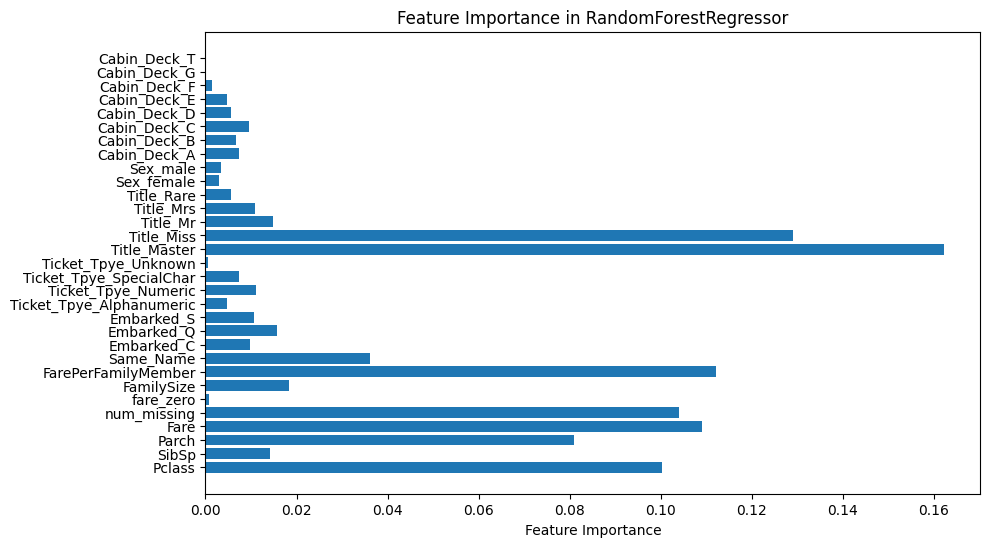

In [517]:
import matplotlib.pyplot as plt
import numpy as np

# RandomForestRegressor の特徴量重要度を取得
feature_importance = model.feature_importances_

# 特徴量名をX軸ラベルに設定（X_trainのカラム名）
feature_names = X_train.columns

# 可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()


### モデルの適応

In [515]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 'Age' 欠損値の行を除いた学習データを準備
train_x_age = train_x.dropna(subset=['Age'])  # 'Age' 欠損値がない行のみ
X_train_age = train_x_age.drop(columns=['Age'])
y_train_age = train_x_age['Age']

# 'Age' 欠損値がある行を準備
train_x_age_missing = train_x[train_x['Age'].isnull()]  # 'Age' 欠損値がある行
X_train_age_missing = train_x_age_missing.drop(columns=['Age'])

# ランダムフォレスト回帰モデルを作成
model = RandomForestRegressor(n_estimators=100, random_state=42)

# モデルを学習
model.fit(X_train_age, y_train_age)

# 学習データの欠損している 'Age' を予測
predicted_age = model.predict(X_train_age_missing)

# 予測した 'Age' を欠損値に埋め込む
train_x.loc[train_x['Age'].isnull(), 'Age'] = predicted_age

# テストデータの 'Age' 欠損値を予測
X_test_age_missing = test_x[test_x['Age'].isnull()].drop(columns=['Age'])
predicted_test_age = model.predict(X_test_age_missing)

# 予測した 'Age' をテストデータの欠損値に埋め込む
test_x.loc[test_x['Age'].isnull(), 'Age'] = predicted_test_age

# 結果確認
print("Missing values in train_x['Age'] after filling:", train_x['Age'].isnull().sum())
print("Missing values in test_x['Age'] after filling:", test_x['Age'].isnull().sum())


ValueError: Found array with 0 sample(s) (shape=(0, 31)) while a minimum of 1 is required by RandomForestRegressor.

In [ ]:
if (train_x['Age']<0).any():
    print("Ageにマイナスの値が含まれています．")
else:
    print('Ageにマイナスの値は含まれていません')

Ageにマイナスの値は含まれていません


In [ ]:
"""
from sklearn.metrics import r2_score, mean_squared_error

# 学習データで予測
train_predictions = model.predict(X_train_age)

# テストデータで予測
X_test = test_x.drop(columns=['Age'])  # 'Age'を除いたテストデータの特徴量
test_predictions = model.predict(X_test)

# R²スコアの計算
train_r2 = r2_score(y_train_age, train_predictions)
test_r2 = r2_score(test_x['Age'], test_predictions)

# MSEの計算
train_mse = mean_squared_error(y_train_age, train_predictions)
test_mse = mean_squared_error(test_x['Age'], test_predictions)

# RMSE (平均二乗誤差の平方根) の計算
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# 結果表示
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
# 結果表示
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
"""

Training R²: 0.7802
Test R²: 0.4479
Training MSE: 46.3259
Test MSE: 98.6115
Training RMSE: 6.8063
Test RMSE: 9.9303


In [ ]:
train_x

,Pclass,Age,SibSp,Parch,Fare,num_missing,fare_zero,FamilySize,FarePerFamilyMember,Same_Name,...,Sex_female,Sex_male,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,3,22.000000,1,0,-0.502445,1,0,2,-0.454798,2,...,False,True,False,False,False,False,False,False,False,False
1,1,38.000000,1,0,0.786845,0,0,2,0.438994,1,...,True,False,False,False,True,False,False,False,False,False
2,3,26.000000,0,0,-0.488854,1,0,1,-0.334757,1,...,True,False,False,False,False,False,False,False,False,False
3,1,35.000000,1,0,0.420730,0,0,2,0.185187,2,...,True,False,False,False,True,False,False,False,False,False
4,3,35.000000,0,0,-0.486337,1,0,1,-0.331267,2,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,-0.386671,1,0,1,-0.193081,1,...,False,True,False,False,False,False,False,False,False,False
887,1,19.000000,0,0,-0.044381,0,0,1,0.281499,3,...,True,False,False,True,False,False,False,False,False,False
888,3,17.011135,1,2,-0.176263,2,0,4,-0.392335,2,...,True,False,False,False,False,False,False,False,False,False
889,1,26.000000,0,0,-0.044381,0,0,1,0.281499,1,...,False,True,False,False,True,False,False,False,False,False


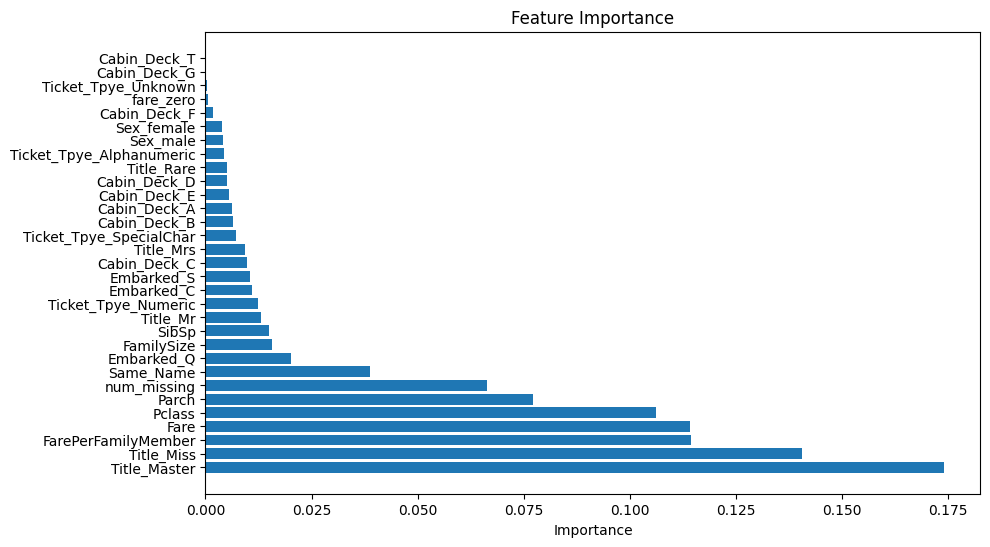

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ランダムフォレストモデルを再学習（すでに学習済みのものを使う）
model.fit(X_train_age, y_train_age)

# 特徴量の重要度を取得
feature_importances = model.feature_importances_

# 特徴量名を取得（X_train_age のカラム名）
feature_names = X_train_age.columns

# 重要度が高い順に並べる
indices = np.argsort(feature_importances)[::-1]

# 重要度のプロット
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(feature_names)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()


In [ ]:
#train_x['Predict_Age'] = train_x['Age'].copy()
#test_x['Predict_Age'] = test_x['Age'].copy()

In [ ]:
#train_x[['Predict_Age']].to_csv('train_age_data.csv',index=False)
#test_x[['Predict_Age']].to_csv('test_age_data.csv',index=False)